In [48]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/opt/tljh/user/lib/moab/lib/python3.6/site-packages/pymoab-5.1.0-py3.6-linux-x86_64.egg')
from pymoab import core, types
from pymoab.rng import Range
import generate_stats as gs

# TYPE FILENAME BELOW

In [49]:
input_file = 'donut-smaller.h5m'

In [50]:
my_core = core.Core()
my_core.load_file(input_file)

In [51]:
root_set = my_core.get_root_set()
entity_types = [types.MBVERTEX, types.MBTRI, types.MBENTITYSET]

In [52]:
stats, data = gs.collect_statistics(my_core, root_set)

In [53]:
def show_data(data):
    spv_hist(np.array(list(data['S_P_V'].values())))
    tps_hist(np.array(list(data['T_P_S'].values())))
    tpv_hist(np.array(data['T_P_V']))
    tar_hist(np.array(data['T_A_R']))

In [63]:
def spv_hist(spv_data):
    fig, ax = plt.subplots()
    bins = [0,1]
    x = 2
    while x < max(spv_data):
        bins.append(x)
        x = x*2
    bins.append(bins[-1]*2)
    plt.hist(spv_data, bins = bins)
    ax.set_title('Surfaces per Volume')
    ax.set_xlabel('Surfaces')
    ax.set_ylabel('Occurences')

In [68]:
def tps_hist(tps_data):
    bins = [0,1]
    x = 2
    while x < max(tps_data):
        bins.append(x)
        x = x*2
    bins.append(bins[-1]*2)
    fig, ax = plt.subplots()
    plt.hist(tps_data)
    ax.set_title('Triangles per Surface')
    ax.set_xlabel('Triangles')
    ax.set_ylabel('Occurences')

In [72]:
def tpv_hist(tpv_data):
    bins = [0,1]
    x = 10
    while x < max(tpv_data):
        bins.append(x)
        x = x*10
    bins.append(bins[-1]*2)
    fig, ax = plt.subplots()
    plt.hist(tpv_data)
    ax.set_title('Triangles per Vertex')
    ax.set_xlabel('Triangles')
    ax.set_ylabel('Occurences')

In [73]:
def tar_hist(tar_data):
    bins = [0,1]
    x = 10
    while x < max(tar_data):
        bins.appe
    fig, ax = plt.subplots()
    plt.hist(tar_data)
    ax.set_title('Triangle Aspect Ratio')
    ax.set_xlabel('Ratio')
    ax.set_ylabel('Occurences')

[0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]


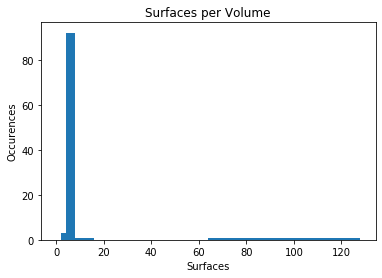

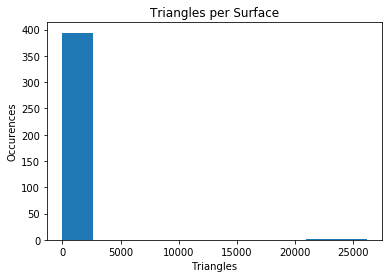

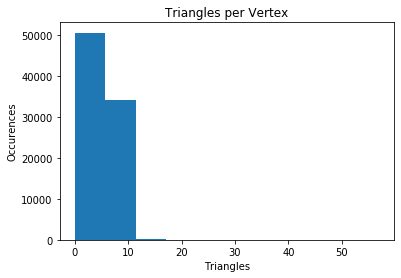

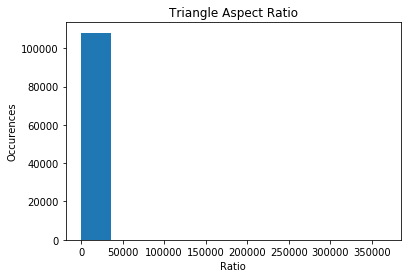

In [74]:
show_data(data)